![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

In [6]:
# Re-run this cell 
import pandas as pd

# Read in the data
schools = pd.read_csv("schools.csv")

# Preview the data
schools.head()
# print(schools.count())

# Start coding here...
# Add as many cells as you like...

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


# Best Math Results Computations

 This code block filters the schools dataset to find schools where the averageh score is at least 80% of the maximum score (800 points).
 It then selects only the 'school_name' and 'average_math' columns from these filtered rows.
 After that, it sorts these schools by their 'average_math' scores in descending order, showing the schools with the highest math scores first.
 Finally, it displays the top 10 schools with the best average math scores.

In [7]:
best_math_schools = schools[(schools["average_math"] / 800) >= 0.8].loc[:,["school_name", "average_math"]].sort_values(by="average_math", ascending=False)
best_math_schools.head(10)

,school_name,average_math
88,Stuyvesant High School,754
170,Bronx High School of Science,714
93,Staten Island Technical High School,711
365,Queens High School for the Sciences at York Co...,701
68,"High School for Mathematics, Science, and Engi...",683
280,Brooklyn Technical High School,682
333,Townsend Harris High School,680
174,High School of American Studies at Lehman College,669
0,"New Explorations into Science, Technology and ...",657
45,Eleanor Roosevelt High School,641


# Top 10 Schools by SAT score

This code calculates the total SAT score for each school by summing the average reading, writing, and math scores. Then, it sorts the schools based on the total SAT score in descending order, selects the top 10 schools, and displays their names along with the total SAT scores.



In [8]:
schools["total_SAT"] = schools["average_reading"] + schools["average_writing"] + schools["average_math"]

top_10_schools = schools.sort_values(by="total_SAT", ascending=False).loc[:,["school_name", "total_SAT"]].head(10)

top_10_schools


,school_name,total_SAT
88,Stuyvesant High School,2144
170,Bronx High School of Science,2041
93,Staten Island Technical High School,2041
174,High School of American Studies at Lehman College,2013
333,Townsend Harris High School,1981
365,Queens High School for the Sciences at York Co...,1947
5,Bard High School Early College,1914
280,Brooklyn Technical High School,1896
45,Eleanor Roosevelt High School,1889
68,"High School for Mathematics, Science, and Engi...",1889


# Finding the largest standard deviation
This code snippet calculates the largest standard deviation of the "total_SAT" column for each borough in the "schools" DataFrame. It groups the DataFrame by the "borough" column, aggregates the "total_SAT" column with the functions "count", "mean", and "std", rounds the results to 2 decimal places, and sorts the result by the "std" column in descending order. Then, it renames the columns to "num_schools", "total_SAT", and "std_SAT". Finally, it returns the row with the largest standard deviation.

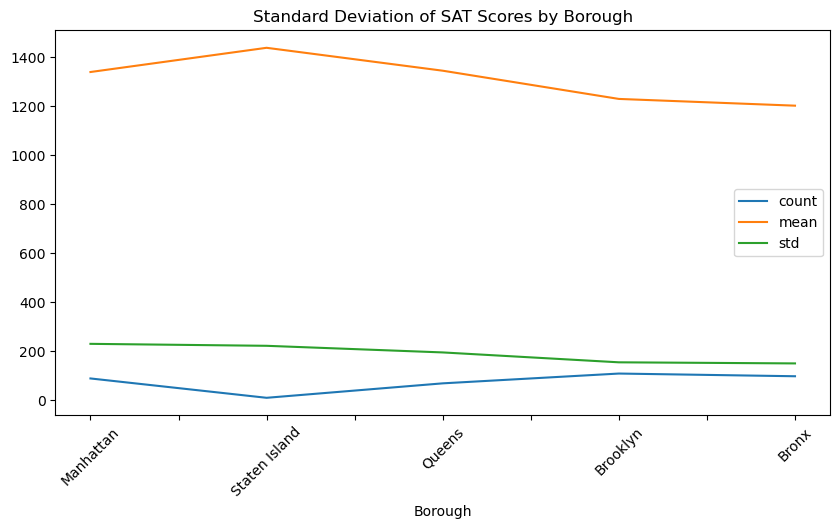

,num_schools,average_SAT,std_SAT
borough,,,
Manhattan,89,1340.13,230.29


In [29]:
largest_std_dev = pd.DataFrame()

largest_std_dev = (
    schools.groupby("borough")["total_SAT"]
    .agg(["count", "mean", "std"])
    .round(2)
    .sort_values(by="std", ascending=False)
)

import matplotlib.pyplot as plt

largest_std_dev.plot(kind="line", figsize=(10, 5))

plt.title("Standard Deviation of SAT Scores by Borough")
plt.xlabel("Borough")

plt.xticks(rotation=45)

plt.show()


largest_std_dev.rename(
    columns={"count": "num_schools", "mean": "average_SAT", "std": "std_SAT"},
    inplace=True,
)

largest_std_dev = largest_std_dev.iloc[0:1]

largest_std_dev